如何制作一个简单的FRM模型

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [232]:
plt.rcParams['font.family'] = ['Arial Unicode MS']#显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False

In [41]:
data = pd.read_csv('userlostprob.txt',sep='\t')

In [43]:
data.dropna(inplace=True)

In [44]:
data

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
13,0,24658,2016-05-18,2016-05-18,0,1.0,1.0,33.0,1.10,0.01,...,193.0,4616.0,0.59,4.980,1.207,614.0,1.52,22,2807.0,15
68,1,24738,2016-05-19,2016-05-19,0,7.0,2.0,4.0,1.11,0.00,...,208.0,1949.0,0.67,20.480,5.153,1831.0,1.75,196,2632.0,20
69,1,24740,2016-05-19,2016-05-19,0,1.0,1.0,2.0,1.02,0.00,...,365.0,134053.0,0.10,1.487,0.320,7761.0,1.00,346,1436.0,12
70,1,24742,2016-05-19,2016-05-19,0,1.0,2.0,11.0,1.07,0.89,...,502.0,273.0,0.54,58.160,11.633,171.0,1.15,356,4589.0,1
76,1,24751,2016-05-19,2016-05-19,0,3.0,2.0,22.0,1.05,0.20,...,339.0,3503.0,0.53,2.147,0.433,2090.0,1.37,194,3900.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689867,0,2238295,2016-05-15,2016-05-15,0,1.0,1.0,5.0,1.04,0.98,...,169.0,3430.0,0.19,8.127,1.147,881.0,1.17,31,1150.0,17
689880,0,2238317,2016-05-15,2016-05-15,1,3.0,1.0,5.0,1.10,0.00,...,99.0,945.0,0.34,8.180,1.827,40.0,1.33,70,2918.0,7
689910,1,2238373,2016-05-15,2016-05-15,1,8.0,1.0,10.0,1.08,0.00,...,91.0,774.0,0.35,0.600,0.213,412.0,1.00,94,2541.0,8
689914,0,2238384,2016-05-15,2016-05-18,0,3.0,2.0,24.0,1.08,0.40,...,113.0,7981.0,0.43,7.640,1.047,1790.0,1.60,318,3025.0,11


In [45]:
def str_date(x):
    out = datetime.datetime.strptime(x,"%Y-%m-%d").date()
    return out

In [46]:
data['delta'] = data.arrival.map(str_date) - data.d.map(str_date)
data['delta'] = data['delta'].dt.days

In [47]:
data.drop(columns=['d','arrival'],inplace=True)

In [99]:
data

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,delta
13,0,24658,0,1.0,1.0,33.0,1.10,0.01,2.0,5.0,...,4616.0,0.59,4.980,1.207,614.0,1.52,22,2807.0,15,0
68,1,24738,0,7.0,2.0,4.0,1.11,0.00,1.0,0.0,...,1949.0,0.67,20.480,5.153,1831.0,1.75,196,2632.0,20,0
69,1,24740,0,1.0,1.0,2.0,1.02,0.00,0.0,0.0,...,134053.0,0.10,1.487,0.320,7761.0,1.00,346,1436.0,12,0
70,1,24742,0,1.0,2.0,11.0,1.07,0.89,3.0,55.0,...,273.0,0.54,58.160,11.633,171.0,1.15,356,4589.0,1,0
76,1,24751,0,3.0,2.0,22.0,1.05,0.20,0.0,251.0,...,3503.0,0.53,2.147,0.433,2090.0,1.37,194,3900.0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689867,0,2238295,0,1.0,1.0,5.0,1.04,0.98,0.0,89.0,...,3430.0,0.19,8.127,1.147,881.0,1.17,31,1150.0,17,0
689880,0,2238317,1,3.0,1.0,5.0,1.10,0.00,49.0,0.0,...,945.0,0.34,8.180,1.827,40.0,1.33,70,2918.0,7,0
689910,1,2238373,1,8.0,1.0,10.0,1.08,0.00,44.0,1.0,...,774.0,0.35,0.600,0.213,412.0,1.00,94,2541.0,8,0
689914,0,2238384,0,3.0,2.0,24.0,1.08,0.40,0.0,23.0,...,7981.0,0.43,7.640,1.047,1790.0,1.60,318,3025.0,11,3


In [50]:
X = data.loc[:,['consuming_capacity','price_sensitive','ordernum_oneyear'
                ,'avgprice','ctrip_profits','lasthtlordergap','cityorders'
                ,'lastpvgap','visitnum_oneyear','h','delta']]

In [52]:
Y_label = data.label

In [53]:
y = data.cr

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
clf = RandomForestRegressor()
clf=clf.fit(X,y)
weights = clf.feature_importances_
weights

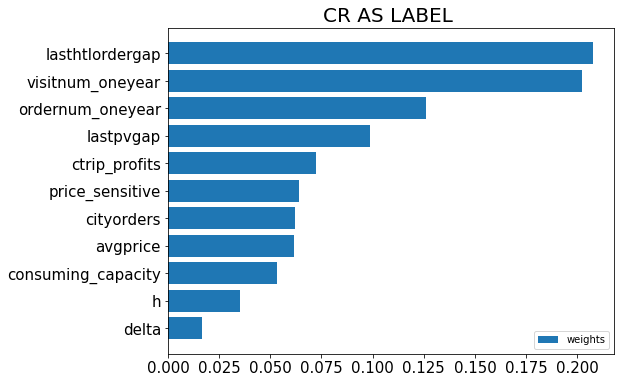

In [61]:
df_cr = pd.DataFrame(dict(zip(columns,weights)),index=['weights']).T.sort_values(by='weights')
plt.figure(figsize=(8,6))
plt.barh(df_cr.index,df_cr.values[:,0],label='weights')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.title('CR AS LABEL ',fontsize=20);

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf_1 = RandomForestClassifier()
clf_1 = clf_1.fit(X,Y_label)
weights_label = clf_1.feature_importances_
weights_label

In [74]:
df_label = pd.DataFrame(dict(zip(X_label.columns,weights_label)),index=['weights']).T.sort_values(by='weights')
df_label.values[:,0]

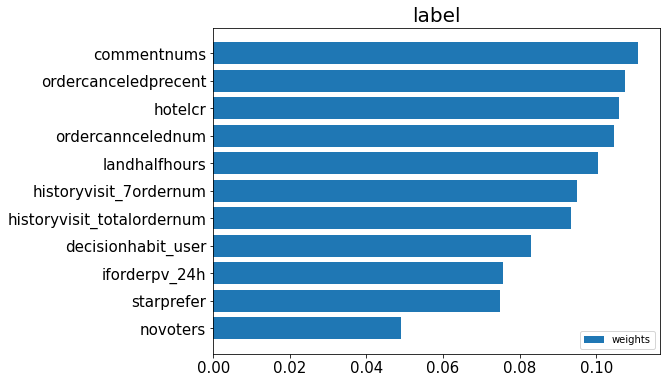

In [76]:
#通过观察重要性，选择F,R,M各一个重要性最靠前的变量
plt.figure(figsize=(8,6))
plt.barh(df_label.index,df_label.values[:,0],label='weights')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.title('label',fontsize=20);

In [77]:
pd.DataFrame({'R':'lasthtlordergap','F':'ordernum_oneyear','M':'avgprice'},index=['模型'])

,R,F,M
模型,lasthtlordergap,ordernum_oneyear,avgprice


In [78]:
rfm = data.loc[:,['sampleid','ordernum_oneyear','avgprice','lasthtlordergap']].rename(columns={'ordernum_oneyear':'F','avgprice':'M','lasthtlordergap':'R'})
rfm.head()

,sampleid,F,M,R
13,24658,33.0,1000.0,4616.0
68,24738,4.0,199.0,1949.0
69,24740,2.0,1310.0,134053.0
70,24742,11.0,427.0,273.0
76,24751,22.0,441.0,3503.0


In [79]:
clf_rfm  = RandomForestRegressor()
clf_rfm = clf_rfm.fit(rfm[["F",'M','R']],y)

In [111]:
#用这三个变量的特征重要性作为FRM分别的权重
weights_rfm = clf_rfm.feature_importances_
weights_rfm

array([0.21031927, 0.31414693, 0.4755338 ])

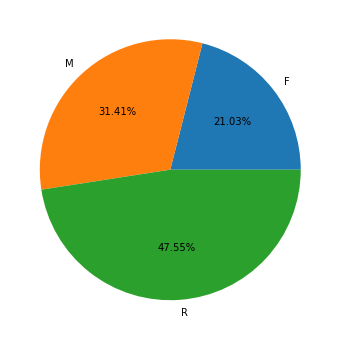

In [89]:
df_rfm = pd.DataFrame(dict(zip(rfm.columns[1:],weights_rfm)),index=['weights']).T.sort_values(by='weights')
plt.figure(figsize=(6,6))
plt.pie(df_rfm.values.flatten(),
    explode=None,
    labels=['F','M','R'],
    autopct='%.2f%%');

In [90]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
sampleid,24285.0,629984.842207,411027.356360,24658.0,316692.0,604648.0,890517.0,2238389.0
F,24285.0,23.106280,27.156639,1.0,6.0,14.0,30.0,711.0
M,24285.0,402.183611,263.069433,48.0,232.0,338.0,492.0,4924.0
R,24285.0,20541.836772,54983.479960,1.0,1627.0,3745.0,10748.0,516136.0


In [91]:
#选取0,25分位,75分位，max的作为bin，划分FRM的评级
f_bins = [-1,6,30,711]
m_bins = [8,232,492,4924]
r_bins = [-1,1627.0,10748.00,516136.0]

In [92]:
rfm['R_score'] = pd.cut(rfm['R'],r_bins,labels=[i for i in range(len(r_bins)-1,0,-1)])
rfm['F_score'] = pd.cut(rfm['F'],f_bins,labels=[i+1 for i in range(len(r_bins)-1)])
rfm['M_score'] = pd.cut(rfm['M'],m_bins,labels=[i+1 for i in range(len(r_bins)-1)])

In [93]:
rfm

,sampleid,F,M,R,R_score,F_score,M_score
13,24658,33.0,1000.0,4616.0,2,3,3
68,24738,4.0,199.0,1949.0,2,1,1
69,24740,2.0,1310.0,134053.0,1,1,3
70,24742,11.0,427.0,273.0,3,2,2
76,24751,22.0,441.0,3503.0,2,2,2
...,...,...,...,...,...,...,...
689867,2238295,5.0,257.0,3430.0,2,1,2
689880,2238317,5.0,125.0,945.0,3,1,1
689910,2238373,10.0,121.0,774.0,3,2,1
689914,2238384,24.0,419.0,7981.0,2,2,2


In [94]:
rfm = rfm.apply(np.int32)

In [95]:
rfm['rfm_score'] = rfm['F']*weights_rfm[0] + rfm['M']*weights_rfm[1] +rfm['R']*weights_rfm[2]

In [96]:
rfm['R_score'] = rfm['R_score'].astype(np.str)
rfm['F_score'] = rfm['F_score'].astype(np.str)
rfm['M_score'] = rfm['M_score'].astype(np.str)
rfm['rfm_group'] = rfm['R_score'].str.cat(rfm['F_score']).str.cat(rfm['M_score'])

In [97]:
rfm

,sampleid,F,M,R,R_score,F_score,M_score,rfm_score,rfm_group
13,24658,33,1000,4616,2,3,3,2516.151505,233
68,24738,4,199,1949,2,1,1,990.171901,211
69,24740,2,1310,134053,1,1,3,64158.686199,113
70,24742,11,427,273,3,2,2,266.274979,322
76,24751,22,441,3503,2,2,2,1808.960736,222
...,...,...,...,...,...,...,...,...,...
689867,2238295,5,257,3430,2,1,2,1712.868306,212
689880,2238317,5,125,945,3,1,1,489.699408,311
689910,2238373,10,121,774,3,2,1,408.178136,321
689914,2238384,24,419,7981,2,2,2,3931.910518,222


In [98]:
All = pd.merge(data.loc[:,['label','sampleid']],rfm,how='left',on='sampleid')
All

,label,sampleid,F,M,R,R_score,F_score,M_score,rfm_score,rfm_group
0,0,24658,33,1000,4616,2,3,3,2516.151505,233
1,1,24738,4,199,1949,2,1,1,990.171901,211
2,1,24740,2,1310,134053,1,1,3,64158.686199,113
3,1,24742,11,427,273,3,2,2,266.274979,322
4,1,24751,22,441,3503,2,2,2,1808.960736,222
...,...,...,...,...,...,...,...,...,...,...
24280,0,2238295,5,257,3430,2,1,2,1712.868306,212
24281,0,2238317,5,125,945,3,1,1,489.699408,311
24282,1,2238373,10,121,774,3,2,1,408.178136,321
24283,0,2238384,24,419,7981,2,2,2,3931.910518,222


In [100]:
data_display = All.groupby(['rfm_group','label'],as_index=False)['sampleid'].count()

In [101]:
data_score = All.groupby(['rfm_group','label'],as_index=False)['rfm_score'].sum()

In [102]:
data_display.columns = ['rfm_group','label','number']
data_display['rfm_group'] = data_display['rfm_group'].astype(np.int32)
data_display

,rfm_group,label,number
0,111,0,364
1,111,1,316
2,112,0,491
3,112,1,390
4,113,0,238
5,113,1,240
6,121,0,264
7,121,1,376
8,122,0,681
9,122,1,890


In [104]:
data_score.columns = ['rfm_group','label','sum']
data_score['rfm_group'] = data_score['rfm_group'].astype(np.int32)
data_score

,rfm_group,label,sum
0,111,0,1.974750e+07
1,111,1,1.866743e+07
2,112,0,2.655277e+07
3,112,1,2.296833e+07
4,113,0,1.654602e+07
5,113,1,9.386946e+06
6,121,0,5.812511e+06
7,121,1,1.045097e+07
8,122,0,1.929646e+07
9,122,1,2.400735e+07


In [106]:
data_score.to_excel('data_score.xlsx')

In [107]:
data_score_1=pd.read_excel('data_score.xlsx',index_col=0) 

number = (number_0 - number_1)*log(sum(rfm_score)_0/sum(rfm_score)_1)